# Convolutional Neural Network Architecture



In [4]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

FileNotFoundError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/


[Errno 2] No such file or directory: '/content/drive/MyDrive/'
/content


In [5]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NameError: ignored

In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [7]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.7341 - accuracy: 0.5222

31/31 [==============================] - 110s 3s/step - loss: 0.7341 - accuracy: 0.5222 - val_loss: 0.7473 - val_accuracy: 0.5081
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.6427 - accuracy: 0.6051

31/31 [==============================] - 97s 3s/step - loss: 0.6427 - accuracy: 0.6051 - val_loss: 0.5707 - val_accuracy: 0.6653
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 0.4665 - accuracy: 0.7808

31/31 [==============================] - 98s 3s/step - loss: 0.4665 - accuracy: 0.7808 - val_loss: 0.3584 - val_accuracy: 0.8347
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 0.3131 - accuracy: 0.8667

31/31 [==============================] - 101s 3s/step - loss: 0.3131 - accuracy: 0.8667 - val_loss: 0.2607 - val_accuracy: 0.9153
Epoch 5/20
31/31 [==============================] - ETA: 0s - loss: 0.2731 - accuracy: 0.8869

31/31 [==============================] - 108s 4s/step - loss: 0.2731 - accuracy: 0.8869 - val_loss: 0.2520 - val_accuracy: 0.9153
Epoch 6/20
31/31 [==============================] - ETA: 0s - loss: 0.1707 - accuracy: 0.9384

31/31 [==============================] - 99s 3s/step - loss: 0.1707 - accuracy: 0.9384 - val_loss: 0.1911 - val_accuracy: 0.9234
Epoch 7/20
31/31 [==============================] - ETA: 0s - loss: 0.1658 - accuracy: 0.9394

31/31 [==============================] - 102s 3s/step - loss: 0.1658 - accuracy: 0.9394 - val_loss: 0.1737 - val_accuracy: 0.9435
Epoch 8/20
31/31 [==============================] - 98s 3s/step - loss: 0.1200 - accuracy: 0.9606 - val_loss: 0.2597 - val_accuracy: 0.8992
Epoch 9/20
31/31 [==============================] - ETA: 0s - loss: 0.1080 - accuracy: 0.9616

31/31 [==============================] - 96s 3s/step - loss: 0.1080 - accuracy: 0.9616 - val_loss: 0.1312 - val_accuracy: 0.9516
Epoch 10/20
31/31 [==============================] - 100s 3s/step - loss: 0.0744 - accuracy: 0.9737 - val_loss: 0.1602 - val_accuracy: 0.9435
Epoch 11/20
31/31 [==============================] - ETA: 0s - loss: 0.0673 - accuracy: 0.9768

31/31 [==============================] - 106s 3s/step - loss: 0.0673 - accuracy: 0.9768 - val_loss: 0.1211 - val_accuracy: 0.9516
Epoch 12/20
31/31 [==============================] - 93s 3s/step - loss: 0.0656 - accuracy: 0.9828 - val_loss: 0.1579 - val_accuracy: 0.9476
Epoch 13/20
31/31 [==============================] - 100s 3s/step - loss: 0.0421 - accuracy: 0.9889 - val_loss: 0.1520 - val_accuracy: 0.9516
Epoch 14/20
31/31 [==============================] - 93s 3s/step - loss: 0.0276 - accuracy: 0.9909 - val_loss: 0.1429 - val_accuracy: 0.9597
Epoch 15/20
31/31 [==============================] - 101s 3s/step - loss: 0.0352 - accuracy: 0.9879 - val_loss: 0.1358 - val_accuracy: 0.9516
Epoch 16/20
31/31 [==============================] - 98s 3s/step - loss: 0.0403 - accuracy: 0.9808 - val_loss: 0.3147 - val_accuracy: 0.9113
Epoch 17/20
31/31 [==============================] - 108s 4s/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.1601 - val_accuracy: 0.9476
Epoch 18/20
31/31 [==

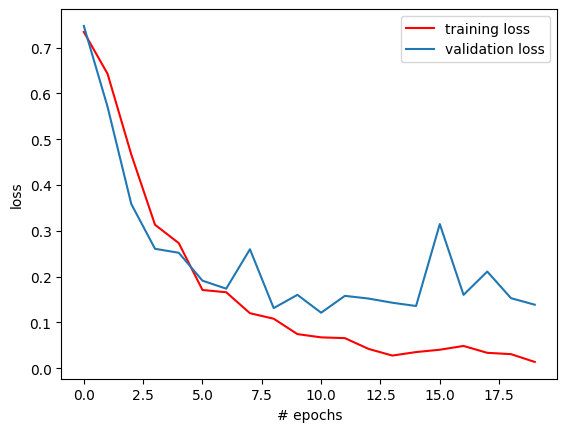

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

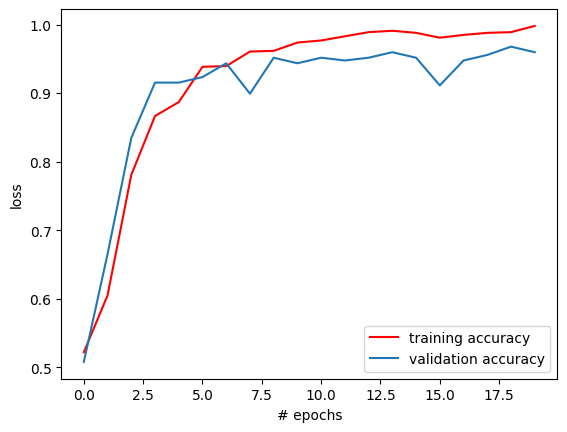

In [9]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 3s 550ms/step - loss: 0.2040 - accuracy: 0.9348
[0.20402905344963074, 0.9347826242446899]
